In [54]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal


def sph2cart(r, theta, phi):
    '''spherical to Cartesian transformation.'''
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

def sphview(ax):
    '''returns the camera position for 3D axes in spherical coordinates'''
    r = np.square(np.max([ax.get_xlim(), ax.get_ylim()], 1)).sum()
    theta, phi = np.radians((90-ax.elev, ax.azim))
    return r, theta, phi

def ravzip(*itr):
    '''flatten and zip arrays'''
    return zip(*map(np.ravel, itr))

%matplotlib inline

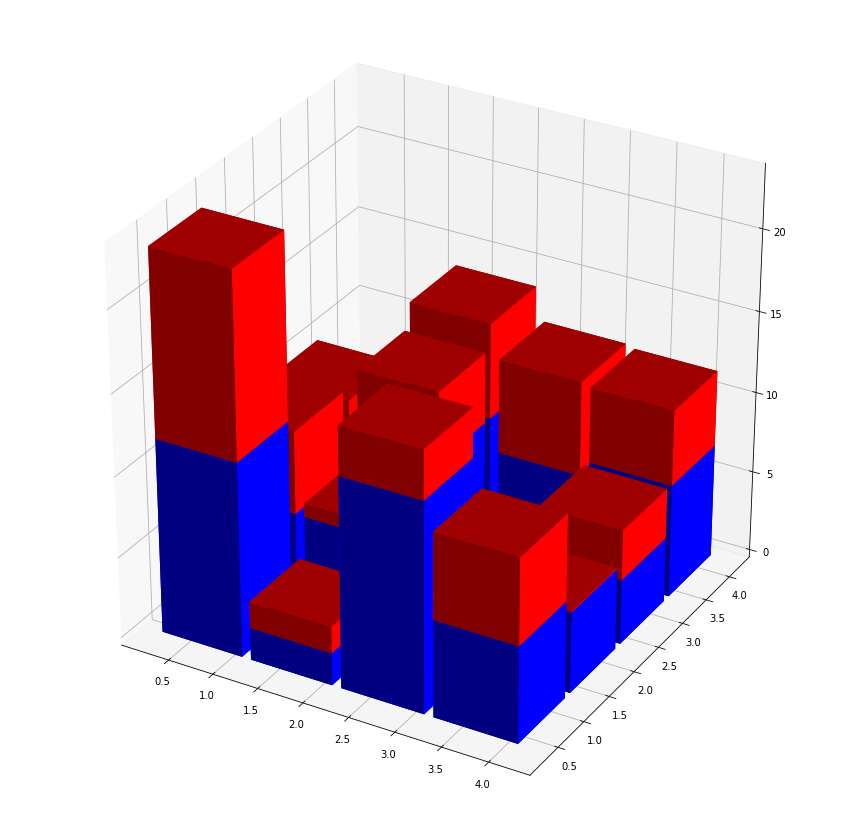

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

fig.set_figheight(15)
fig.set_figwidth(15)

x, y = np.random.rand(2, 100) * 4
hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 4], [0, 4]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
# z position set to zero
zpos1 = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx_arr = np.ones_like(zpos)*0.9
dy_arr = dx_arr.copy()
dz1_arr = hist.flatten()
# Create a random second histogram
dz2_arr = dz1_arr * np.random.rand(16)
# Set z position to the values of the first histogram
zpos2 = dz1_arr


# Get the camera's location in Cartesian coordinates.
x1, y1, z1 = sph2cart(*sphview(ax))
camera = np.array((x1,y1,0))
# Calculate the distance of each bar from the camera.
z_order = xpos*camera[0]+ypos*camera[1]

for i, (x,y,z1, z2, dx, dy, dz1 ,dz2) in enumerate(ravzip(xpos, ypos, zpos1, zpos2, dx_arr, dy_arr, dz1_arr, dz2_arr)):
    pl = ax.bar3d(x, y, z1, dx, dy, dz1, color='b', zsort='max')
    pl._sort_zpos = z_order[i]
    pl = ax.bar3d(x, y, z2, dx, dy, dz2, color='r', zsort='max')
    pl._sort_zpos = z_order[i]

In [61]:
camera

array([ 0.8660254, -1.5      ,  0.       ])

In [46]:
zo2

array([[0.09150635, 0.09150635, 0.09150635, 0.09150635, 0.45753175,
        0.45753175, 0.45753175, 0.45753175, 0.82355716, 0.82355716,
        0.82355716, 0.82355716, 1.18958256, 1.18958256, 1.18958256,
        1.18958256],
       [0.09150635, 0.45753175, 0.82355716, 1.18958256, 0.09150635,
        0.45753175, 0.82355716, 1.18958256, 0.09150635, 0.45753175,
        0.82355716, 1.18958256, 0.09150635, 0.45753175, 0.82355716,
        1.18958256],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])